# PROJET QUADRATURE NUMERIQUE (EDO)

### Objectif:

Représentation graphique de la trajectoire dans l'espace de phase.

In [5]:
import numpy as np
from matplotlib import pyplot as plt

Création de la classe Resolve pour résoudre l'équation différentielle.
On utilise la méthode Kutta.

In [6]:
class Resolve:


    def __init__(self, L, a, b, N, k):
        '''

        :param L: Paramètre fix à 1
        :param a: intervalle min
        :param b: intervalle max
        :param N: Nombre d'intervalles
        '''

        self.y0 = [np.pi/2, 0]
        self.a = a
        self.b = b
        self.N = N

        self.L = L
        self.k = k
        self.h = (self.b - self.a) / self.N # Le Pas
        self.t = np.linspace(a, b, self.N+1)

    def f(self, y):
        '''
        Fonction pendule
        '''
        a = y[1]
        b = - (9.81/self.L) * np.sin(y[0]) - (self.k/self.L)*y[1]

        return np.array([a, b])

    def kutta2(self):
        '''
        Methode de Runge-Kutta à 2
        :return: t -> les abcisses correspondants à chaque noeud de la fonction.
                 Y -> Les solutions de l'equation
        '''

        y_n = self.y0
        Y = [self.y0]
        for _ in self.t[0:-1]:

            k1 = self.f(y_n)
            k2 = self.f(y_n + (self.h/2)*k1)

            y_n = y_n + (self.h/6)*(k1 + 2*k2) # Calcul de Yn+1
            Y.append(y_n)

        return self.t, np.array(Y)

    def kutta4(self):
        '''
        Methode de Runge-Kutta à 4
        :return: t -> les abcisses correspondants à chaque noeud de la fonction.
                 Y -> Les solutions de l'equation
        '''

        y_n = self.y0
        Y = [self.y0]
        for _ in self.t[0:-1]:

            k1 = self.f(y_n)
            k2 = self.f(y_n + (self.h/2)*k1)
            k3 = self.f(y_n + (self.h/2)*k2)
            k4 = self.f(y_n + self.h*k3)
            y_n = y_n + (self.h/6)*(k1 + 2*k2 + 2*k3 + k4) # Calcul de Yn+1
            Y.append(y_n)

        return self.t, np.array(Y)

On plot $\theta'$ en fonction de  $\theta$

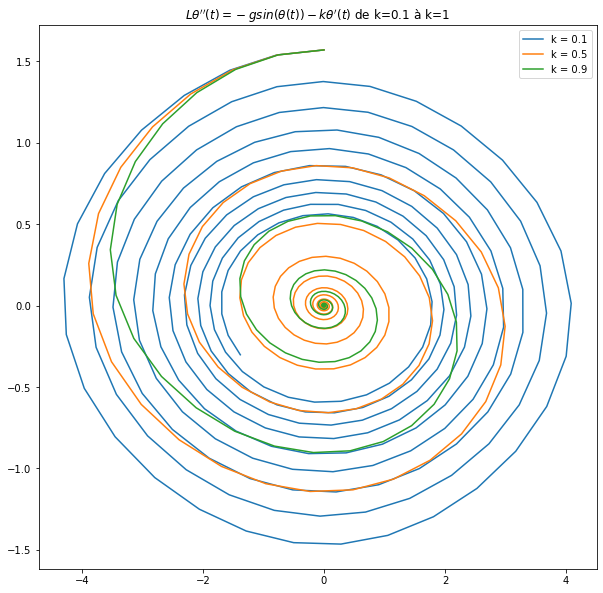

In [7]:
plt.figure(figsize=(10, 10))
for k in np.arange(0.1, 1, 0.4):
    res = Resolve(1, 0, 20, 250, k)
    t, Y = res.kutta4()
    plt.plot(Y[:, 1], Y[:, 0], label=f"k = {k}")

plt.legend()
plt.title("$ \\it{L \\theta''(t) = -gsin(\\theta(t)) - k\\theta'(t)} $ de k=0.1 à k=1")
plt.show()

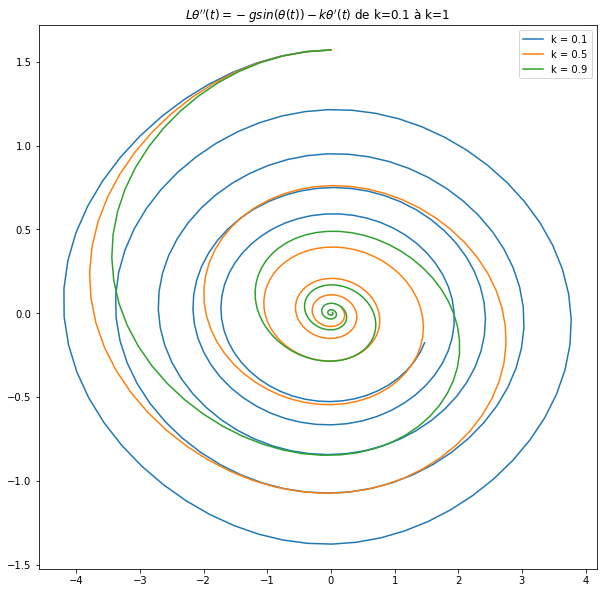

In [8]:
plt.figure(figsize=(10, 10))
for k in np.arange(0.1, 1, 0.4):
    res = Resolve(1, 0, 20, 250, k)
    t, Y = res.kutta2()
    plt.plot(Y[:, 1], Y[:, 0], label=f"k = {k}")

plt.legend()
plt.title("$ \\it{L \\theta''(t) = -gsin(\\theta(t)) - k\\theta'(t)} $ de k=0.1 à k=1")
plt.show()